# 7.1 ファセットの活用

### FacetGridクラスを利用する

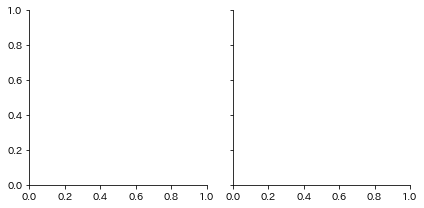

In [2]:
import seaborn as sns

tips = sns.load_dataset('tips')
sns.FacetGrid(tips, col='time')

#### Matplotlibの関数でファセット利用する

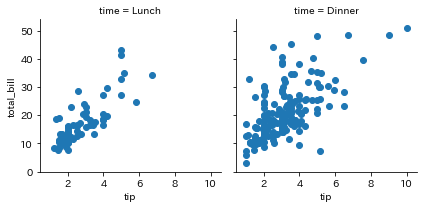

In [4]:
import matplotlib.pyplot as plt

facet_grid = sns.FacetGrid(tips, col='time')
facet_grid.map(plt.scatter, 'tip', 'total_bill')

#### サブプロットを縦に並べる

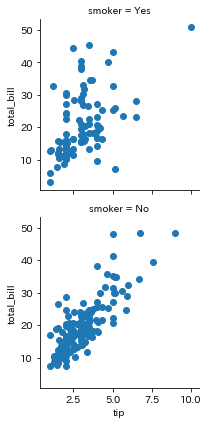

In [7]:
sns.FacetGrid(tips, row='smoker').map(plt.scatter, 'tip', 'total_bill')

#### 格子状に並べて色分けする

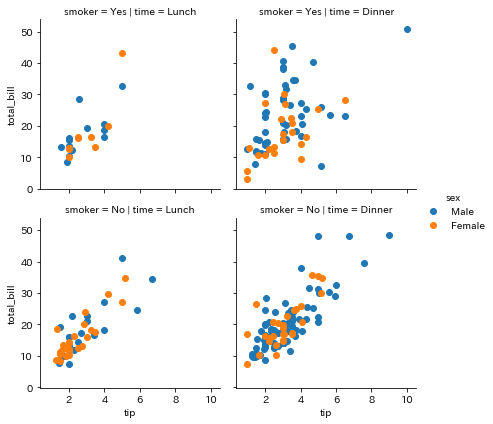

In [8]:
facet_grid = sns.FacetGrid(tips, col='time', row='smoker', hue='sex')
facet_grid.map(plt.scatter, 'tip', 'total_bill')
facet_grid.add_legend()

#### seabornの関数を利用する

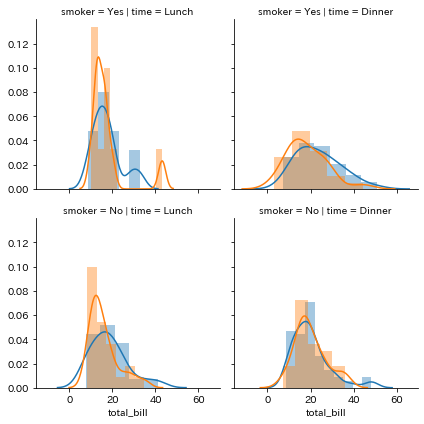

In [10]:
facet_gird = sns.FacetGrid(tips, col='time', row='smoker', hue='sex')
facet_gird.map(sns.distplot, 'total_bill')

#### カスタマイズした関数を利用する

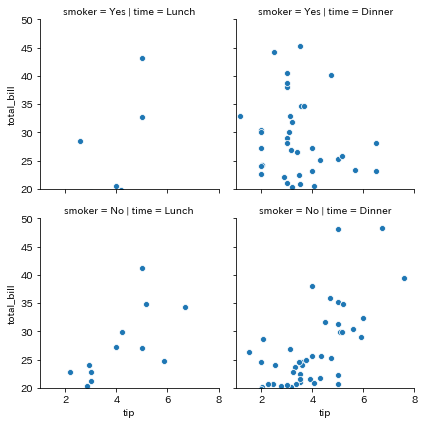

In [14]:
def scatter_set_lim(x, y, color=None, xlim=None, ylim=None):
    ax = sns.scatterplot(x=x, y=y)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    return ax

facet_grid = sns.FacetGrid(tips, col='time', row='smoker')
facet_grid.map(scatter_set_lim, 'tip', 'total_bill',xlim=[1,8], ylim=[20, 50])  

# 7.2 ペアグリッドの活用

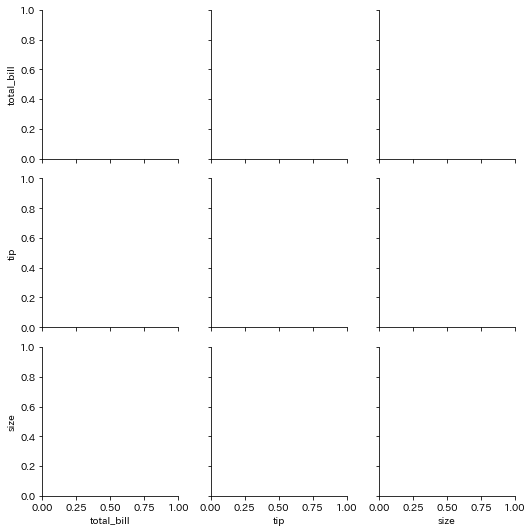

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')
sns.PairGrid(tips)

#### グラフを描画する

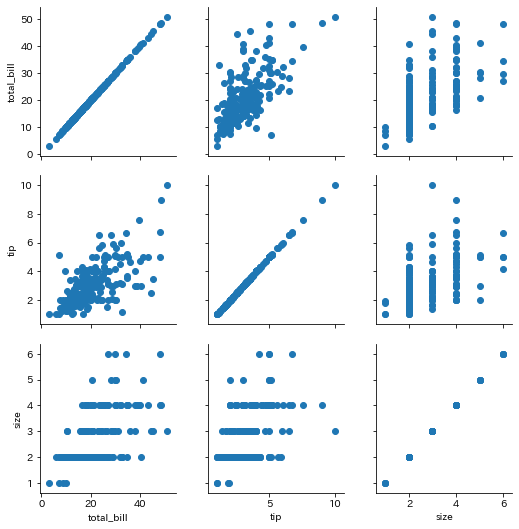

In [17]:
import matplotlib.pyplot as plt

pair_grid = sns.PairGrid(tips)
pair_grid.map(plt.scatter)

#### 色分けする

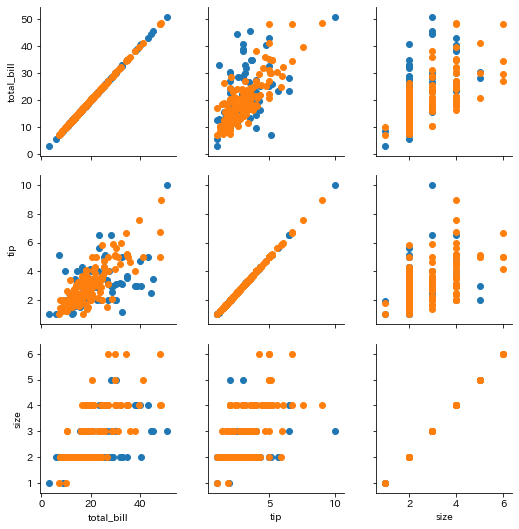

In [18]:
sns.PairGrid(tips, hue='smoker').map(plt.scatter)

#### 複数の種類のグラフを描画する

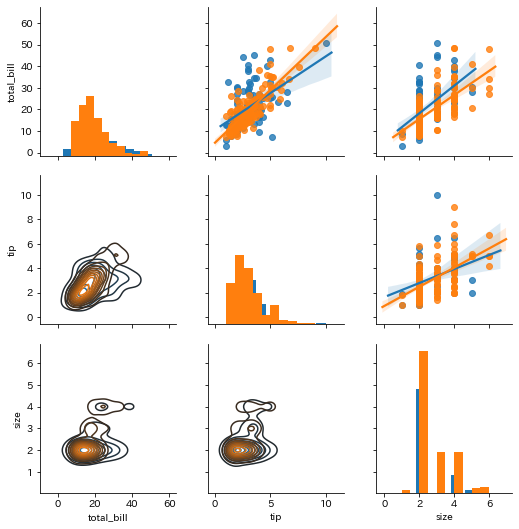

In [19]:
pair_grid_kinds = sns.PairGrid(tips, hue='smoker')
pair_grid_kinds.map_upper(sns.regplot)
pair_grid_kinds.map_diag(plt.hist)
pair_grid_kinds.map_lower(sns.kdeplot)

#### 描画対象列を指定する

In [20]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

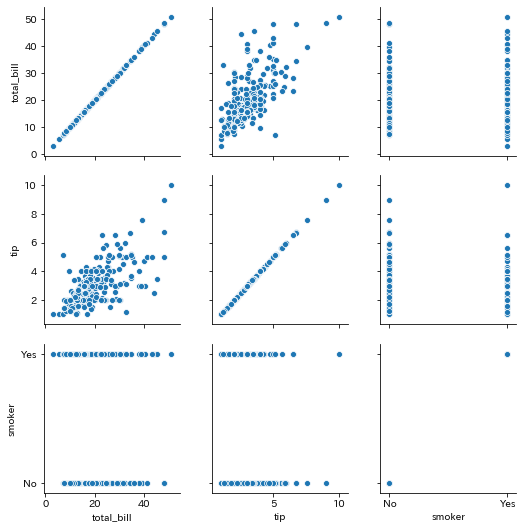

In [22]:
# 引数varsに列名をリスト型で渡すと描画対象となる列を指定できる
sns.PairGrid(tips, vars=['total_bill', 'tip', 'smoker']).map(sns.scatterplot)

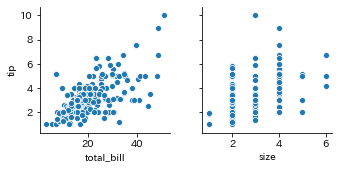

In [23]:
# 引数x_varsにX値をとる列名、y_varsにY値を取る列名を指定出来る
sns.PairGrid(tips, x_vars=['total_bill', 'size'], y_vars=['tip']).map(sns.scatterplot)

# 7.3 ジョイントグリッドの活用

#### JointGridクラスを利用する

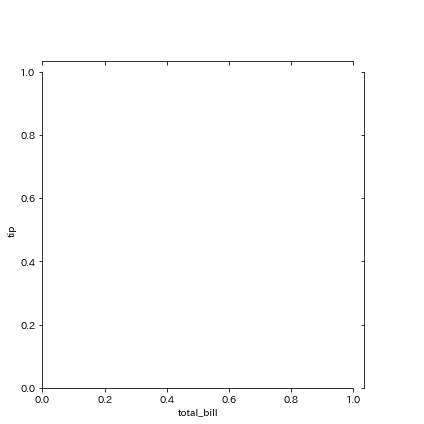

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset('tips')
sns.JointGrid(data=tips, x='total_bill', y='tip')

#### グラフを描画し辺にグラフを追加する

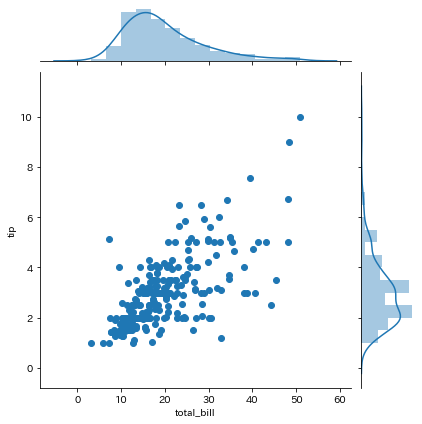

In [3]:
joint_grid = sns.JointGrid(data=tips, x='total_bill', y='tip')
joint_grid.plot(plt.scatter, sns.distplot)

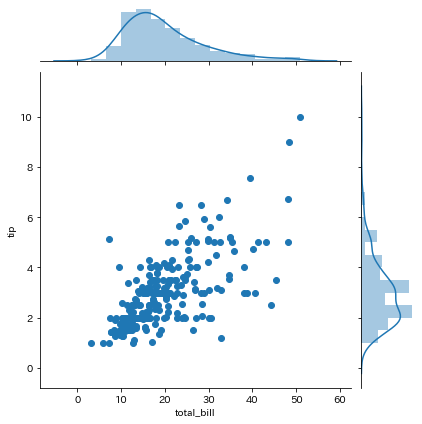

In [5]:
joint_grid = sns.JointGrid(data=tips, x='total_bill', y='tip')
joint_grid.plot_joint(plt.scatter)
joint_grid.plot_marginals(sns.distplot)

#### matplotlibのメソッドを活用

{'whiskers': [<matplotlib.lines.Line2D at 0x1fa0e43e2c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1fa0e45e608>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fa0e432d88>],
 'medians': [<matplotlib.lines.Line2D at 0x1fa0e457f08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fa0e472448>],
 'means': []}

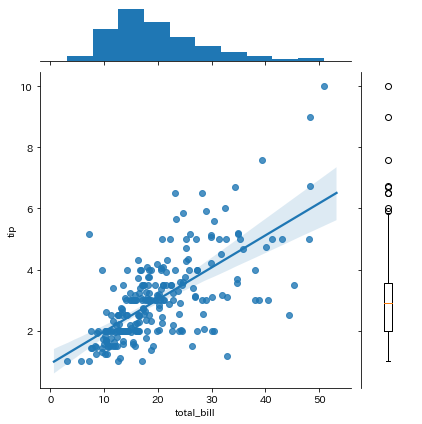

In [6]:
joint_grid_ax = sns.JointGrid(data=tips, x='total_bill', y='tip')
joint_grid_ax.plot_joint(sns.regplot)
joint_grid_ax.ax_marg_x.hist(tips['total_bill'])
joint_grid_ax.ax_marg_y.boxplot(tips['tip'])

# 7.4 axes-level 関数の利用

#### グラフを重ねて描画する

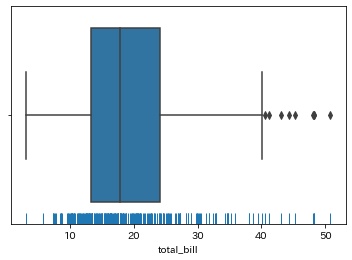

In [8]:
import seaborn as sns

tips = sns.load_dataset('tips')
sns.boxplot(data=tips, x='total_bill')
sns.rugplot(tips['total_bill'])

#### 複数のサブプロットに描画する

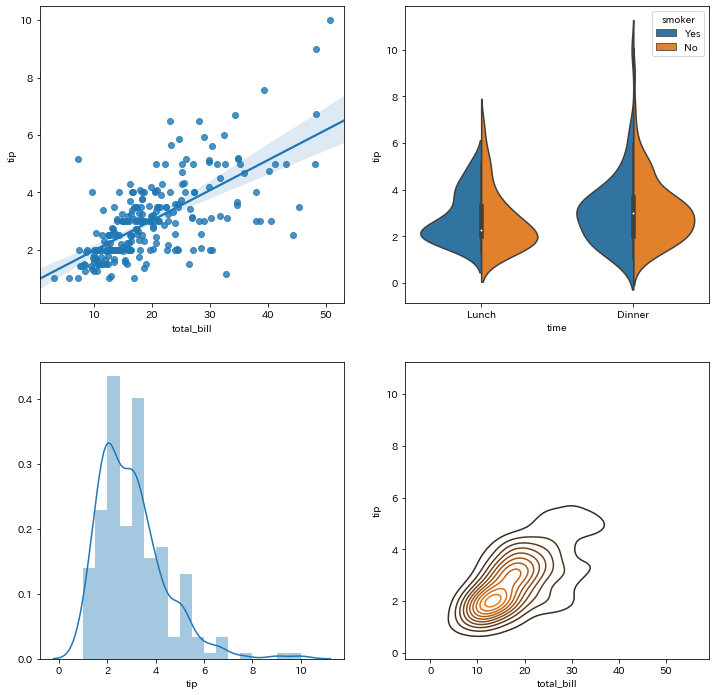

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
sns.regplot(data=tips, x='total_bill', y='tip', ax=ax[0,0])
sns.violinplot(data=tips, x='time', y='tip', hue='smoker', split=True, ax=ax[0,1])
sns.distplot(tips['tip'], ax=ax[1,0])
sns.kdeplot(tips['total_bill'], tips['tip'], ax=ax[1,1])

#### 散布図を描画する

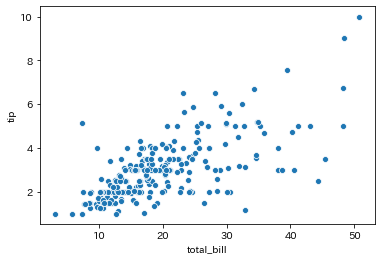

In [14]:
sns.scatterplot(data=tips, x='total_bill', y='tip')

#### 要素を分割して描画

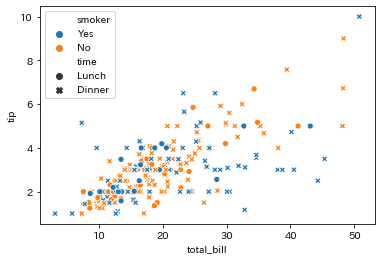

In [15]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='smoker', style='time')

#### 折れ線グラフを描画する

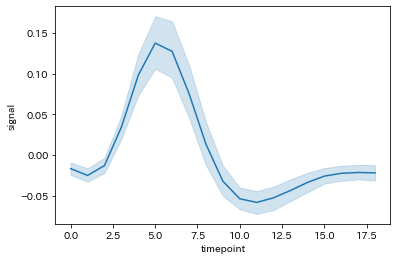

In [16]:
fmri = sns.load_dataset('fmri')
sns.lineplot(data=fmri, x='timepoint', y='signal')

#### 要素を分割して描画

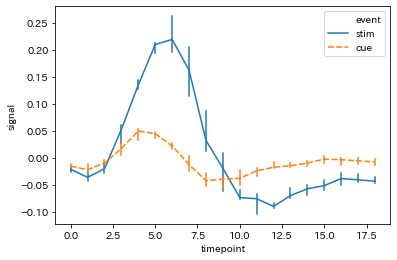

In [17]:
import numpy as np

sns.lineplot(data=fmri, x='timepoint', y='signal',
             estimator=np.median, hue='event', style='event', err_style='bars', ci=68)

#### ストリッププロットを描画する

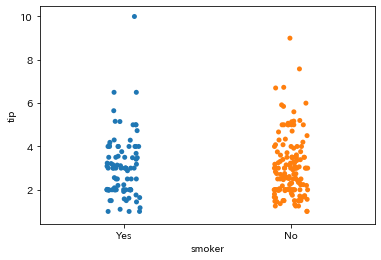

In [18]:
sns.stripplot(data=tips, x='smoker', y='tip')

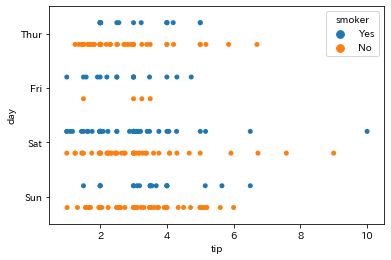

In [19]:
sns.stripplot(data=tips, x='tip', y='day', orient='h', hue='smoker', jitter=0, dodge=True)

#### ビースウォームプロットを描画する

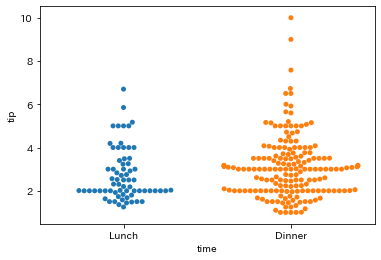

In [20]:
sns.swarmplot(data=tips, x='time', y='tip')

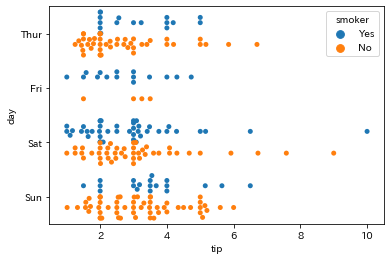

In [21]:
sns.swarmplot(data=tips, x='tip', y='day', orient='h', hue='smoker', dodge=True)

#### 箱ひげ図を描画する

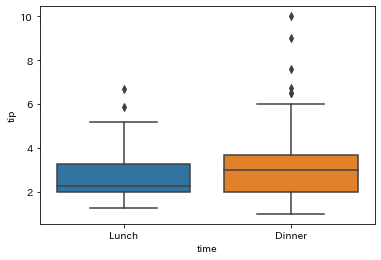

In [22]:
sns.boxplot(data=tips, x='time', y='tip')

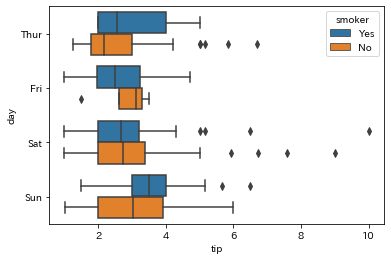

In [23]:
sns.boxplot(data=tips, x='tip', y='day', orient='h', hue='smoker')

#### 分位数を増やした箱ひげ図

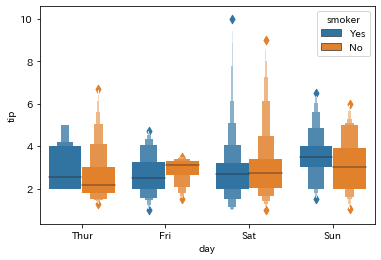

In [25]:
sns.boxenplot(data=tips, x='day', y='tip', hue='smoker')

#### バイオリン図を描画する

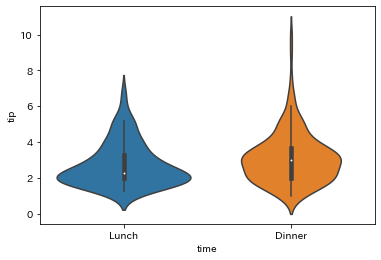

In [26]:
sns.violinplot(data=tips, x='time', y='tip')

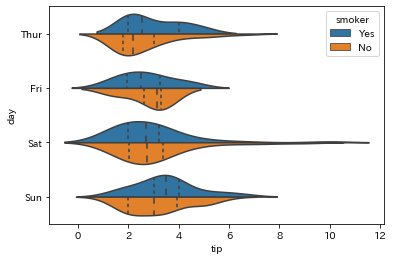

In [27]:
sns.violinplot(data=tips, x='tip', y='day', orinet='h', hue='smoker', split=True, inner='quartile')

#### ポイントプロットを描画する

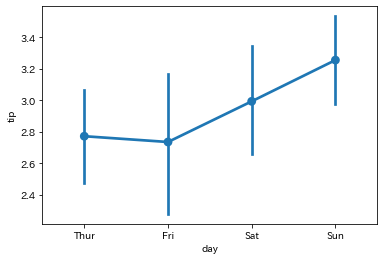

In [28]:
sns.pointplot(data=tips, x='day', y='tip')

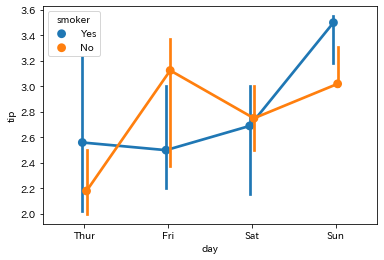

In [31]:
sns.pointplot(data=tips, x='day', y='tip', hue='smoker', ci=66, dodge=True, estimator=np.median)

#### 棒グラフを描画する

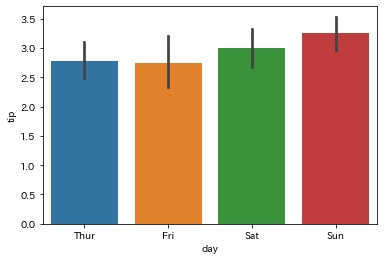

In [32]:
sns.barplot(data=tips, x='day', y='tip')

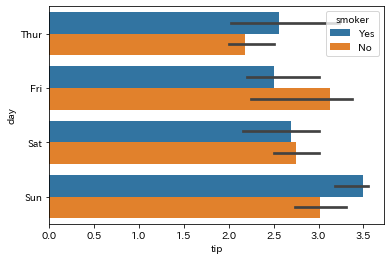

In [35]:
sns.barplot(data=tips, x='tip', y='day', orient='h', hue='smoker', estimator=np.median, ci=68)

#### データの個数を棒グラフに描画

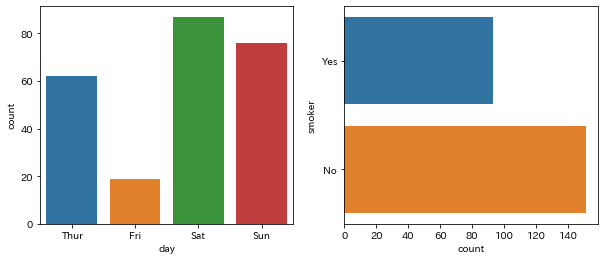

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.countplot(data=tips, x='day', ax=ax[0])
sns.countplot(data=tips, y='smoker', ax=ax[1])

#### データの個数をグループ化して描画する

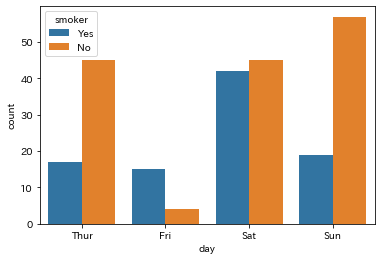

In [37]:
sns.countplot(data=tips, x='day', hue='smoker')

#### ヒストグラム・カーネル密度推定グラフを描画する

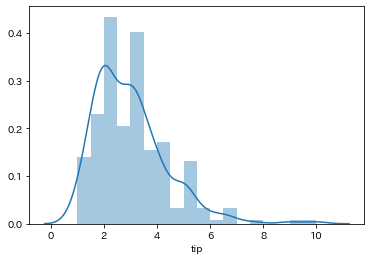

In [39]:
sns.distplot(tips['tip'])

#### 描画方法の指定

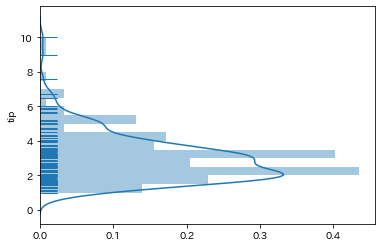

In [3]:
sns.distplot(tips['tip'], vertical=True, hist=True, kde=True, rug=True)

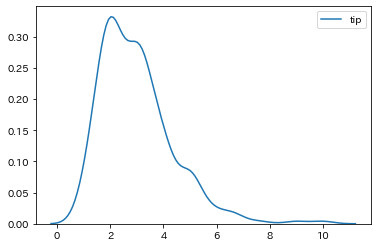

In [4]:
sns.kdeplot(tips['tip'])

#### 2変数の分布を描画

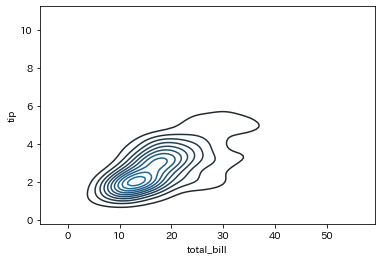

In [6]:
sns.kdeplot(data=tips['total_bill'], data2=tips['tip'])

#### ラグプロットを描画する

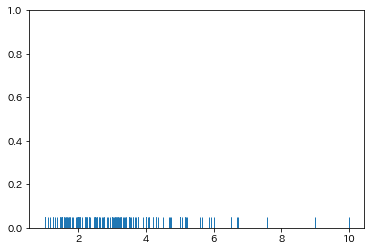

In [8]:
sns.rugplot(tips['tip'])

##### Y軸に沿って描画

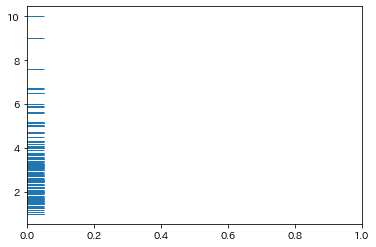

In [9]:
sns.rugplot(tips['tip'], axis='y')

#### 回帰グラフを描画する

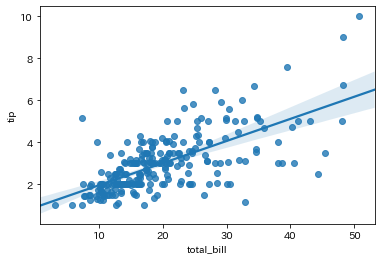

In [11]:
sns.regplot(data=tips, x='total_bill', y='tip')

##### 信頼区間の変更

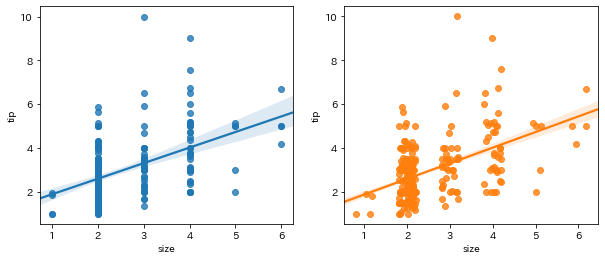

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1,2, figsize=(10, 4))
sns.regplot(data=tips, x='size', y='tip', ax=axes[0])
sns.regplot(data=tips, x='size', y='tip', ci=68, x_jitter=0.2, ax=axes[1])

##### 代表値を描画

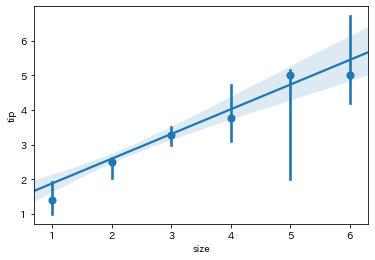

In [16]:
import numpy as np
sns.regplot(data=tips, x='size', y='tip', x_estimator=np.median)

#### 回帰線の残差を可視化する

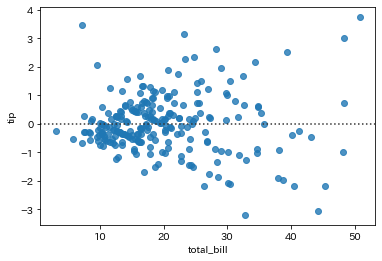

In [17]:
sns.residplot(data=tips, x='total_bill', y='tip')

##### Lowess 平滑化・ロバスト回帰モデルの利用

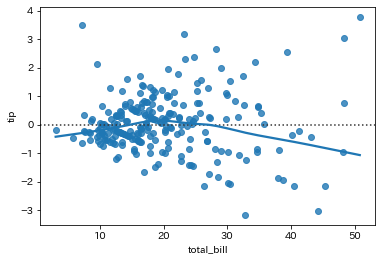

In [18]:
sns.residplot(data=tips, x='total_bill', y='tip', lowess=True, robust=True)

#### ヒートマップを描画する

In [19]:
flights = sns.load_dataset('flights').pivot('month', 'year', 'passengers')
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


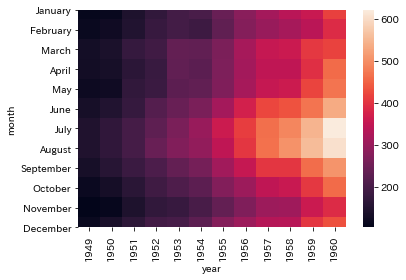

In [20]:
sns.heatmap(flights)

##### カラーマップの指定

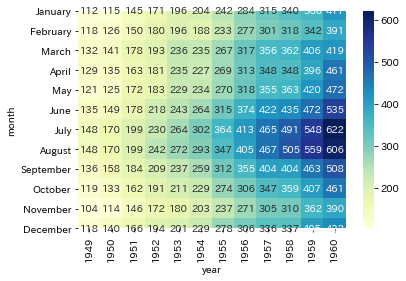

In [23]:
sns.heatmap(flights, cmap='YlGnBu', annot=True, fmt='d')

# 7.5 グラフのスタイルと書式の設定

#### グラフのスタイルを設定する

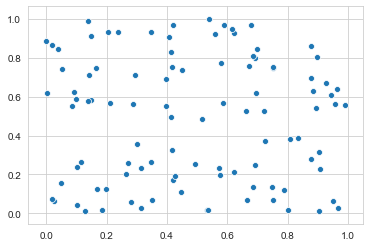

In [24]:
# グラフのスタイルや書式設定はset_style()

%matplotlib inline

import numpy as np
import seaborn as sns

np.random.seed(1)
sns.set_style(style='whitegrid')
x, y = np.random.rand(2, 100)
sns.scatterplot(x=x, y=y)

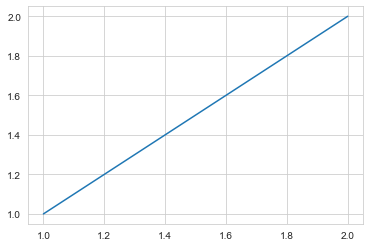

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot([1,2], [1,2])

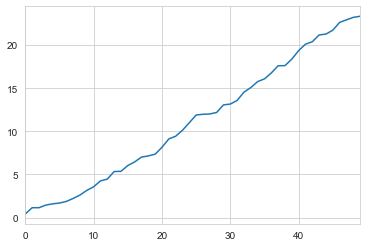

In [26]:
import pandas as pd

np.random.seed(1)
ser = pd.Series(np.random.rand(50).cumsum())
ser.plot()

#### グラフのスタイルをデフォルトに戻す

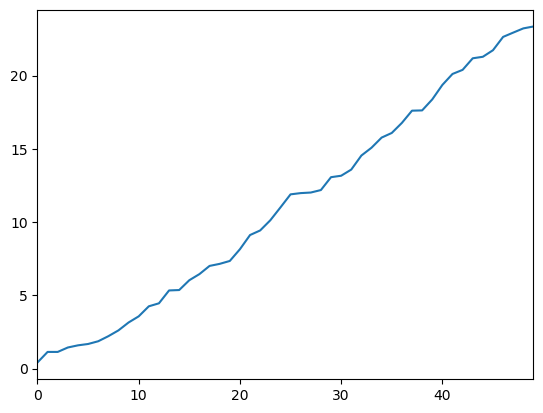

In [27]:
# reset_defaluts()関数でMatplotlibのrcパラメータがデフォルトに戻る
sns.reset_defaults()
ser.plot()

#### 書式を設定する

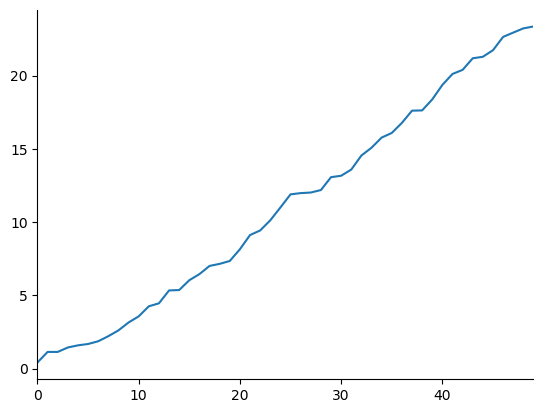

In [28]:
sns.set_style(style={'axes.spines.top':False, 'axes.spines.right': False})
# 下記と同じ
# sns.set_style(rc={'axes.spines.top':False, 'axes.spines.right': False})
ser.plot()

In [29]:
# seabornで設定しいている書式を確認するにはaxes_style()
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': 'black',
 'axes.grid': False,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'black',
 'figure.facecolor': 'white',
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-',
 'text.color': 'black',
 'xtick.color': 'black',
 'ytick.color': 'black',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'projecting',
 'patch.edgecolor': 'black',
 'image.cmap': 'viridis',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif'],
 'patch.force_edgecolor': False,
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': False,
 'axes.spines.top': False}

#### seabornとMatplotlibを併用して書式を設定する

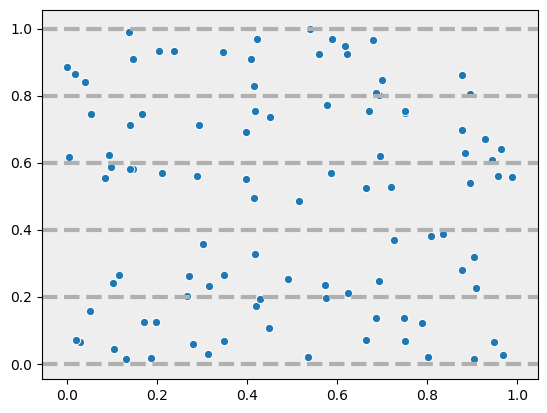

In [34]:
sns.reset_defaults()
sns.set_style({'axes.facecolor': '#eeeeee'})
ax = sns.scatterplot(x=x, y=y)
ax.grid(which='major', axis='y', linestyle='--', linewidth=3)